In [270]:
# Topic: Implement KNN in Water Quality Dataset
# Collaborated by : Aadith Joseph Mathew and Devika S Vinod
# Roll No: 23122101, 23122113
# Date: 16th May 2024
# Submission : 17th May 2024

#### Dataset Description :

* Rows: 7,999

* Columns: 21

* Features:
Chemical concentrations: Includes various chemicals like aluminium, ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, flouride, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, and uranium.
Biological parameters: bacteria and viruses, indicating the presence of biological contaminants.
Safety Indicator: is_safe (1 for safe, 0 for not safe), indicating whether the water quality is considered safe for consumption based on the measured parameters.


#### References : 

* https://www.kaggle.com/code/sabrinajeannin/wine-pca-hierarchical-clustering
* https://www.kaggle.com/code/elisthefox/ultimate-guide-to-k-nearest-neighbors-k-nn#4.-Results-of-K-NN-implementation-after-preparation-of-data 

#### Tools and Libraries : 

* Pandas: For data manipulation and analysis.
* Matplotlib: For creating visualizations such as plots.
* Seaborn: For enhancing the visual aesthetics of plots.
* Scikit-learn: For building and evaluating machine learning models.

#### Sections:

* Importing Libraries
* Loading and Viewing the Dataset
* EDA
* Visualization
* Model Building
* Model Improvement
* Hyperparameter Tuning

--------------------------------------------------------------------------------------------------------------------------------------------------------

#### Importing Libraries

In [271]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


#### Loading and  Viewing the dataset

In [272]:
# Loading dataset
df = pd.read_csv("waterQuality1.csv")

In [273]:
# Print first 5 rows of the dataframe
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [274]:
# Print last 5 rows of the dataframe
df.tail()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7991,0.05,7.78,0.00,1.95,0.04,0.10,0.03,0.03,1.37,0.0,...,0.197,14.29,1.0,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,0.05,24.22,0.02,0.59,0.01,0.45,0.02,0.02,1.48,0.0,...,0.031,10.27,1.0,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,0.09,6.85,0.00,0.61,0.03,0.05,0.05,0.02,0.91,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,0.01,10.00,0.01,2.00,0.00,2.00,0.00,0.09,0.00,0.0,...,0.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.00,1
7995,0.04,6.85,0.01,0.70,0.03,0.05,0.01,0.03,1.00,0.0,...,0.182,15.92,1.0,0.000,1.35,4.84,0.00,0.04,0.05,1


In [275]:
# Getting the shape of the dataframe
df.shape

(7996, 21)

#### EDA

In [276]:
# Columns of the dataframe
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [277]:
# Getting column information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [278]:
# Unique values of each columns
df.nunique()

aluminium       495
ammonia        2563
arsenic         107
barium          480
cadmium          23
chloramine      812
chromium         91
copper          201
flouride        151
bacteria        101
viruses          61
lead            200
nitrates       1803
nitrites        280
mercury          11
perchlorate    2999
radium          735
selenium         11
silver           51
uranium          10
is_safe           2
dtype: int64

In [279]:
# Checking for null values
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [280]:
# Statistical summary of the dataframe
df.describe(include='all')

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


#### Visualization

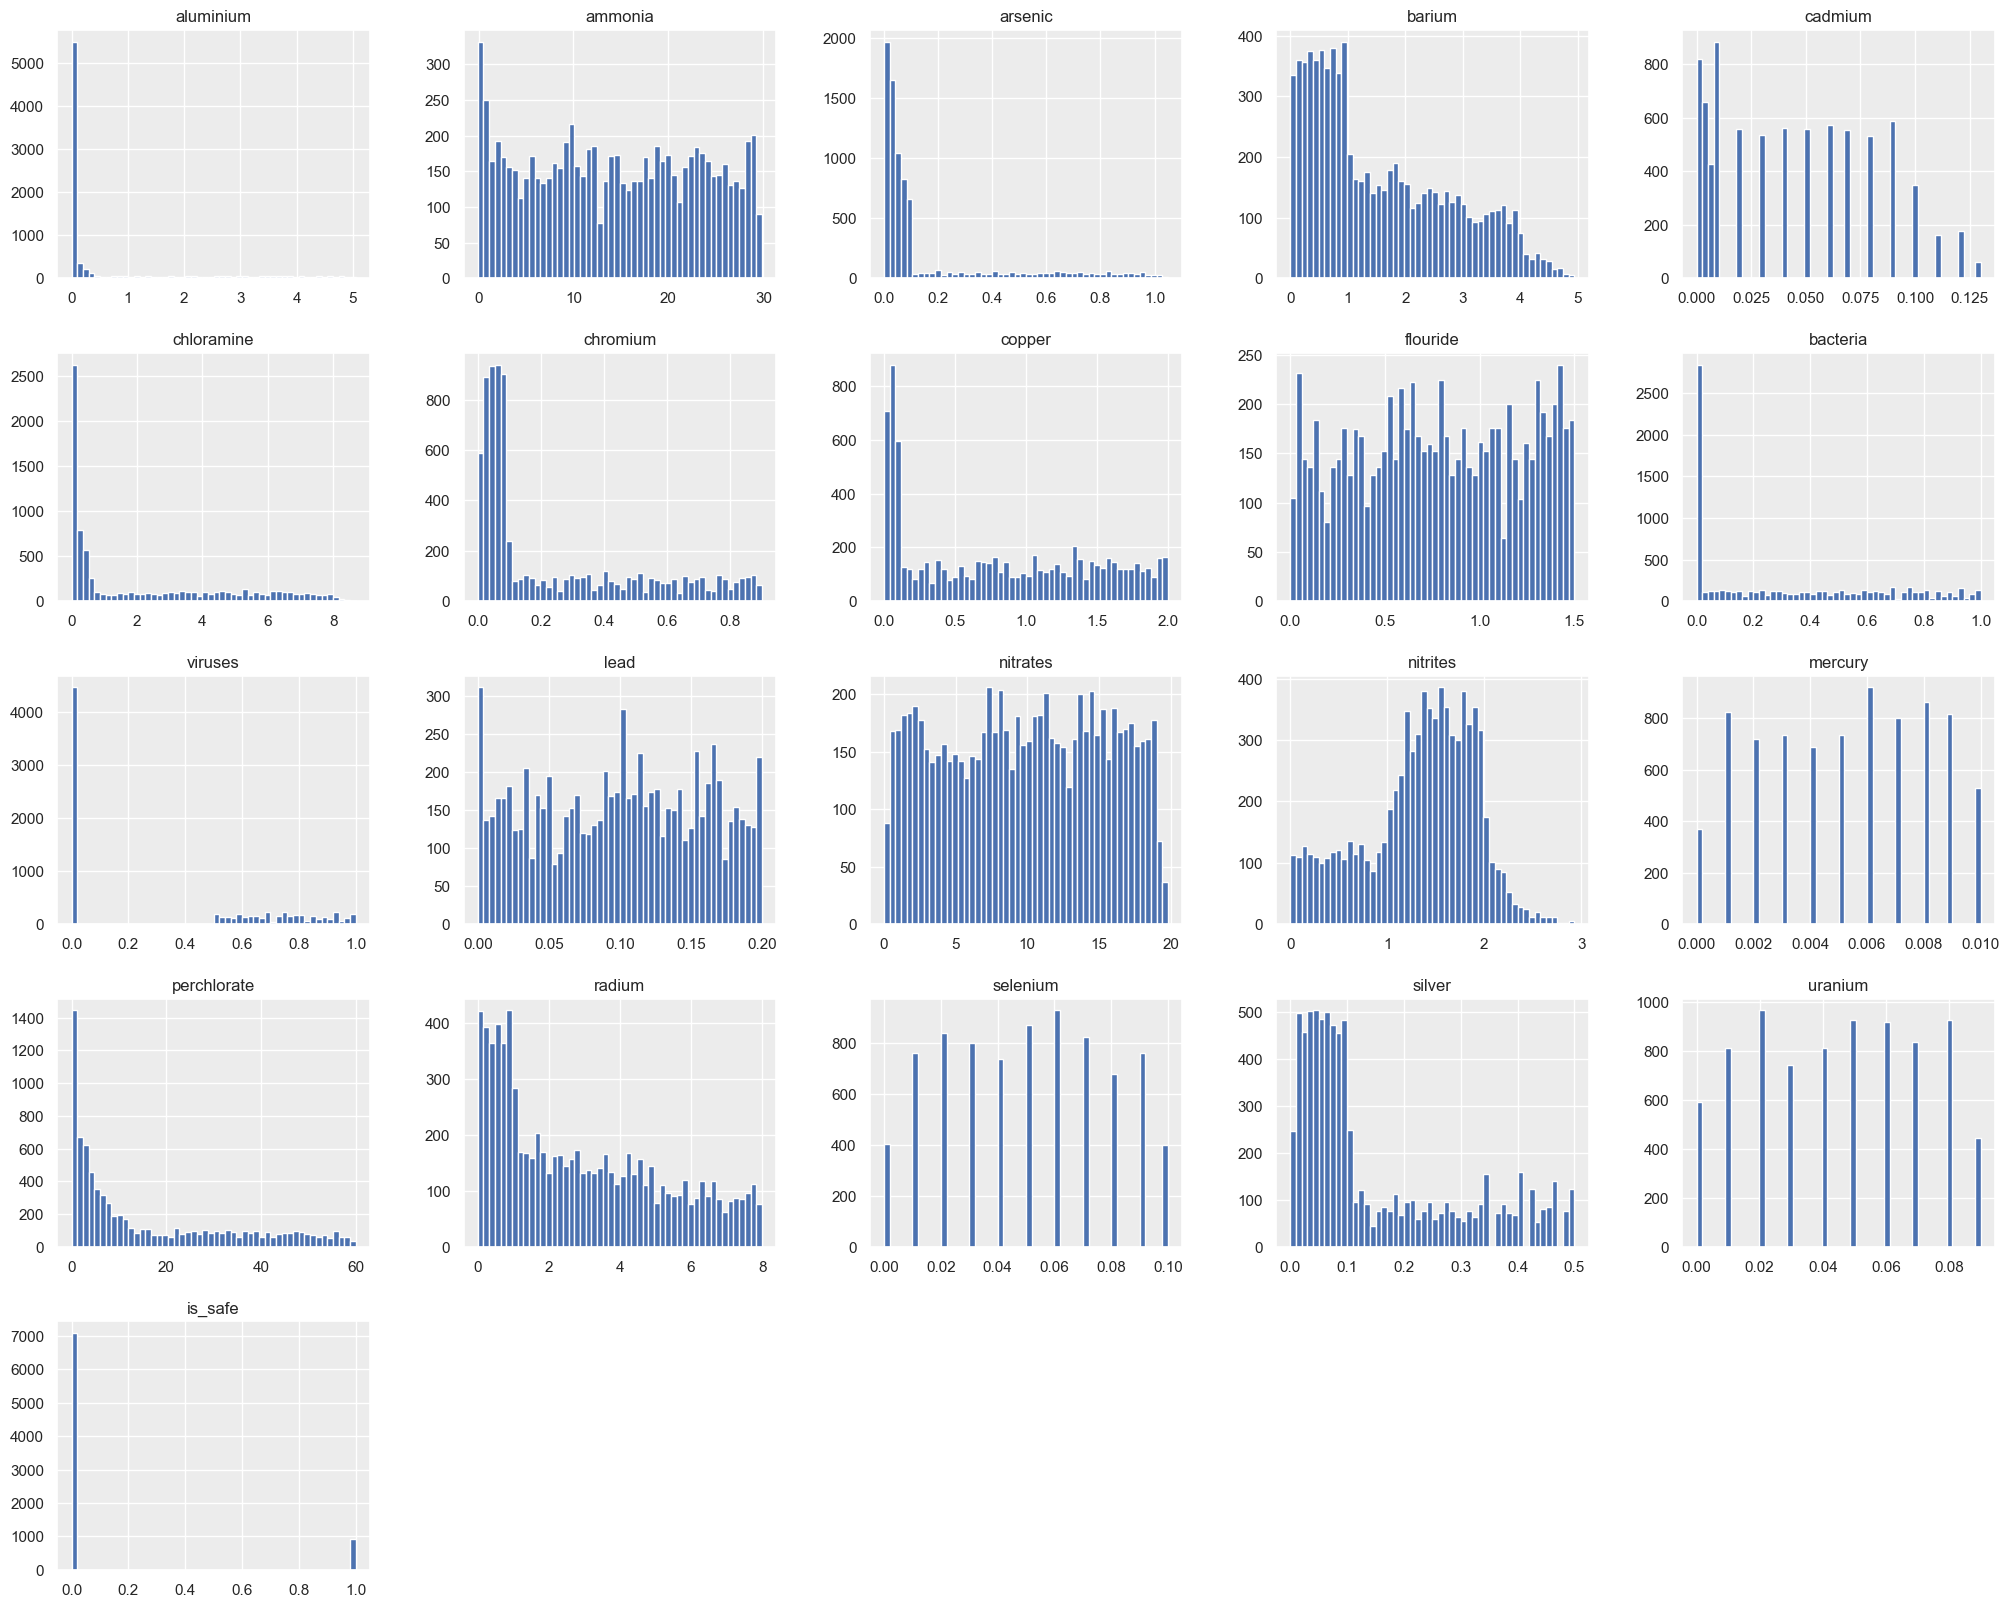

In [281]:
# Viewing the histograms for each numerical feature
df.hist(bins=50, figsize=(25,20));

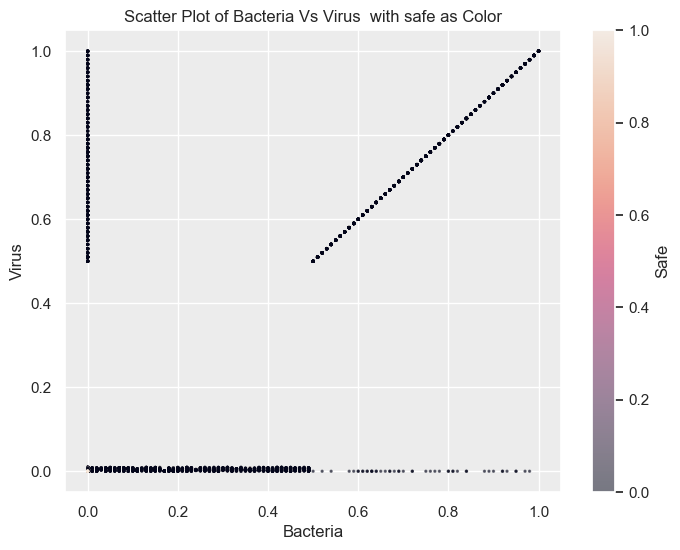

In [282]:
# Plotting Geographical data using Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df['bacteria'], df['viruses'], c=df['is_safe'],alpha=0.5,s =2)

# Define color using median house value
plt.colorbar(label='Safe')

# Add labels and title 
plt.xlabel('Bacteria')
plt.ylabel('Virus')
plt.title('Scatter Plot of Bacteria Vs Virus  with safe as Color')

# View the plot
plt.show()

C:\Users\IDZ\AppData\Local\Temp\ipykernel_14484\4172465249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=var, data=df, palette=[palette[i]])
C:\Users\IDZ\AppData\Local\Temp\ipykernel_14484\4172465249.py:12: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=target, y=var, data=df, palette=[palette[i]])
C:\Users\IDZ\AppData\Local\Temp\ipykernel_14484\4172465249.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=var, data=df, palette=[palette[i]])
C:\Users\IDZ\AppData\Local\Temp\ipykernel_14484\4172465249.py:12: UserWarning: 
The palette list has fewer values (1) than 

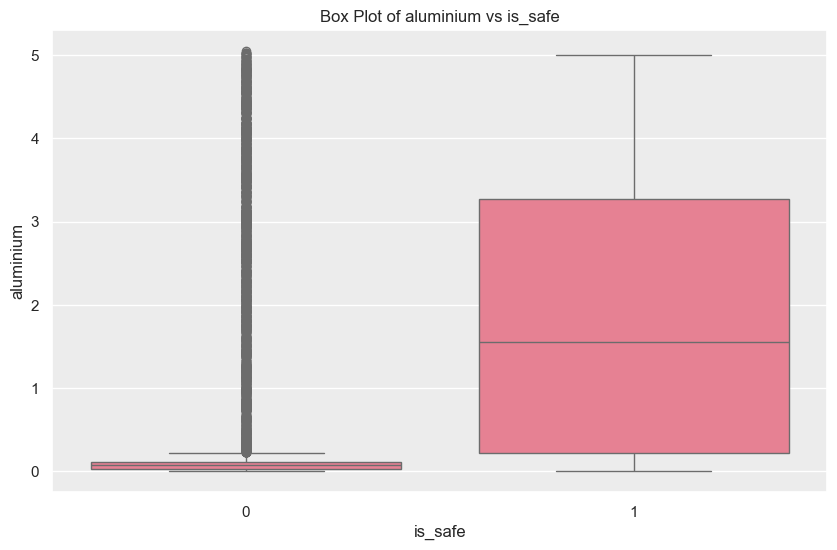

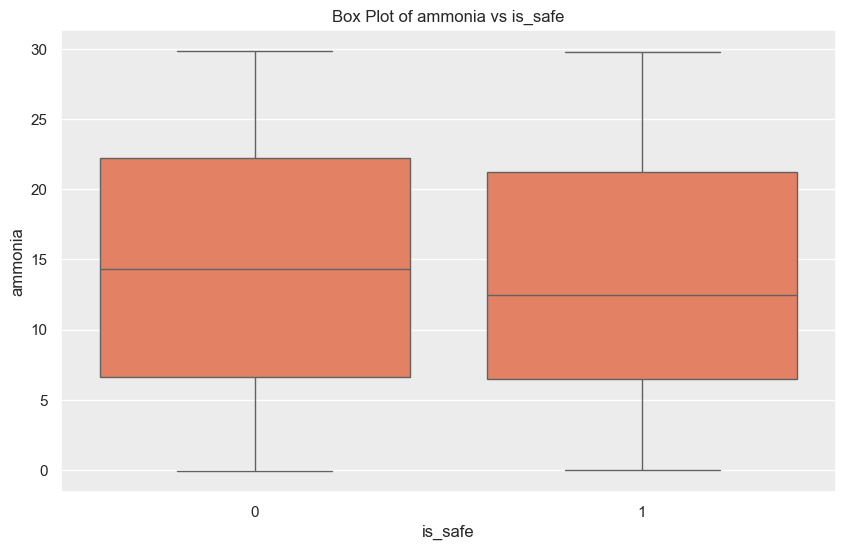

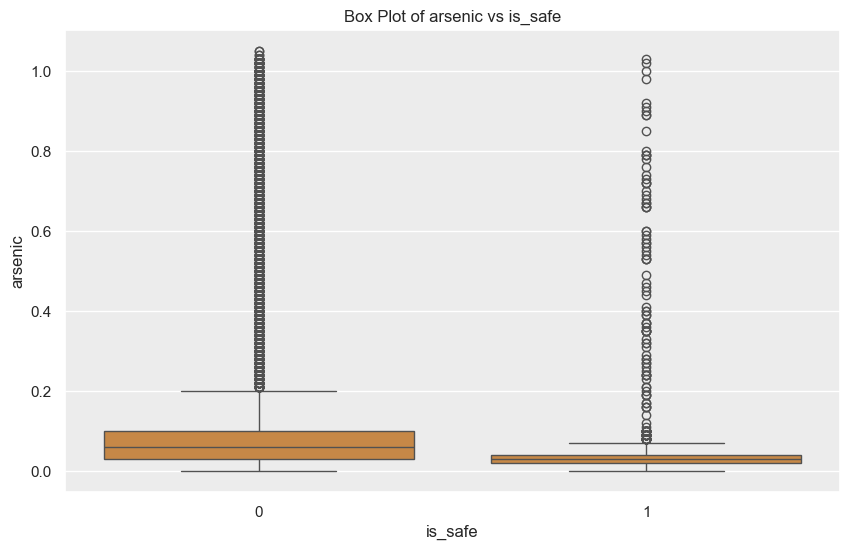

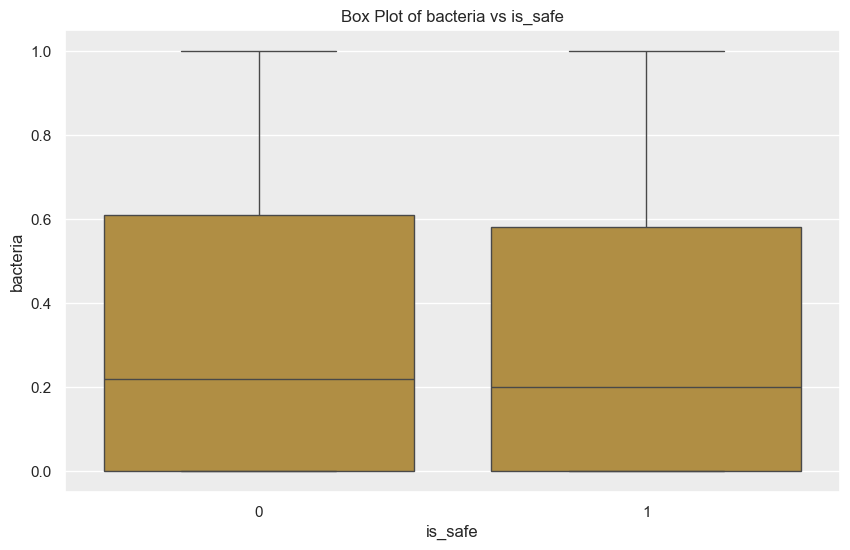

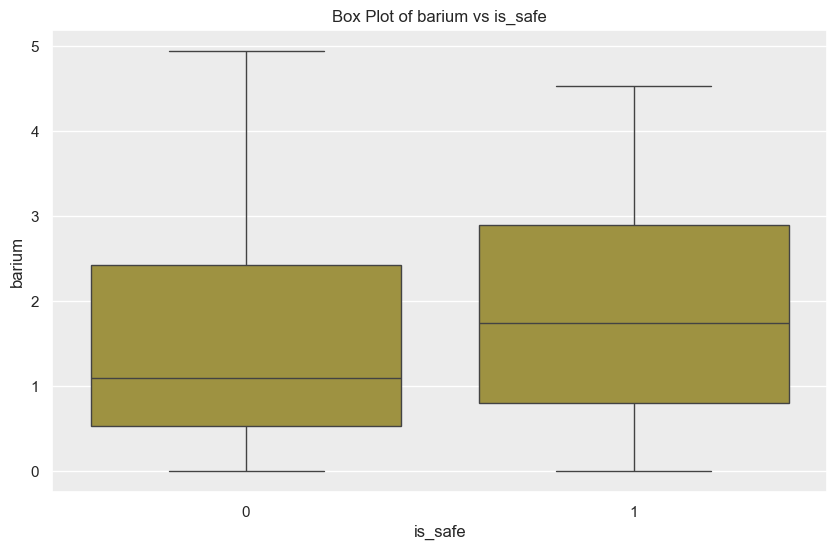

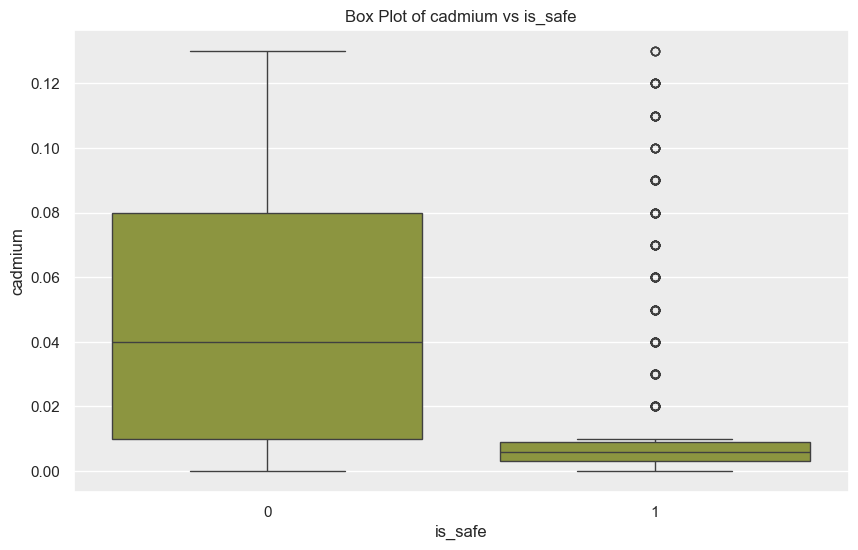

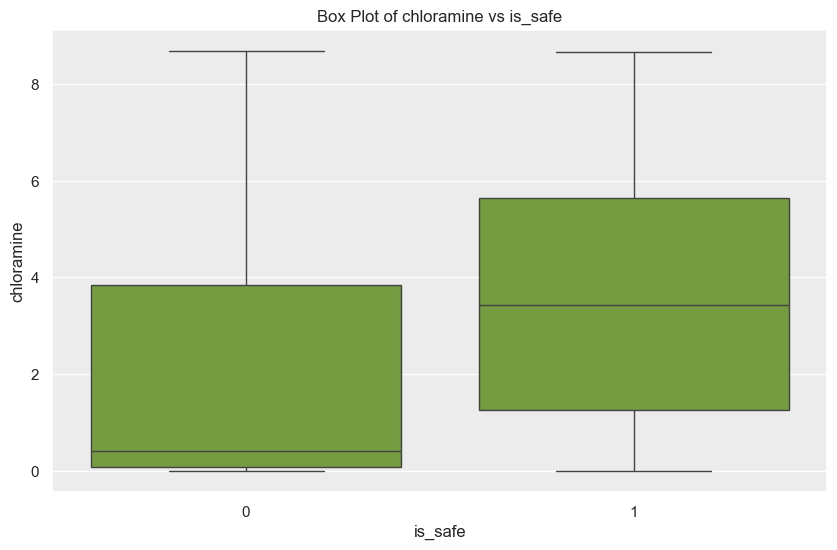

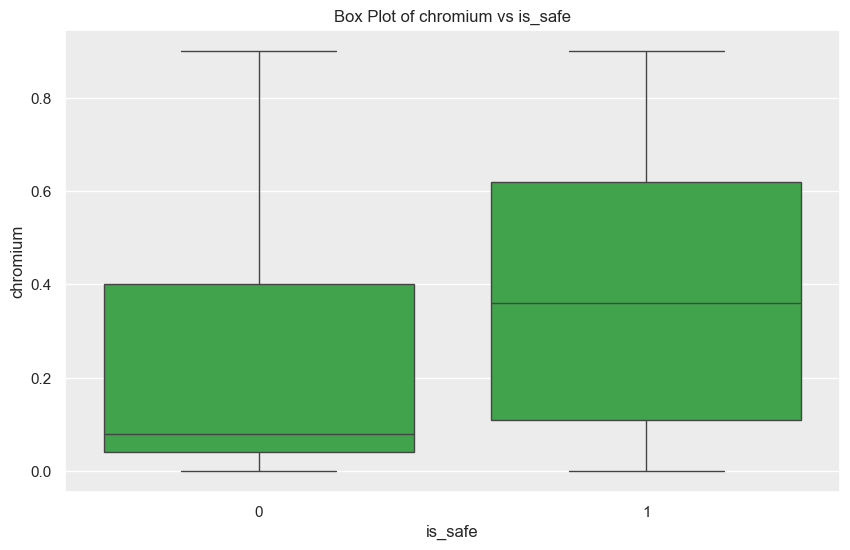

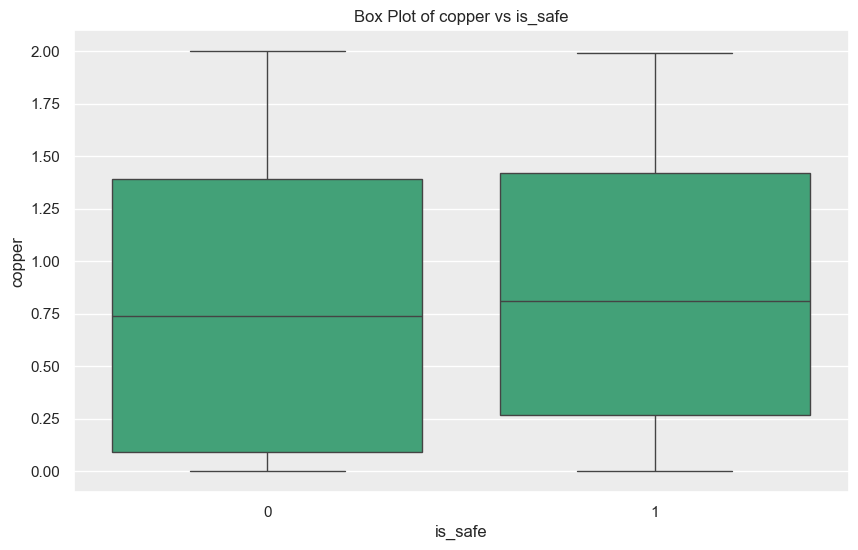

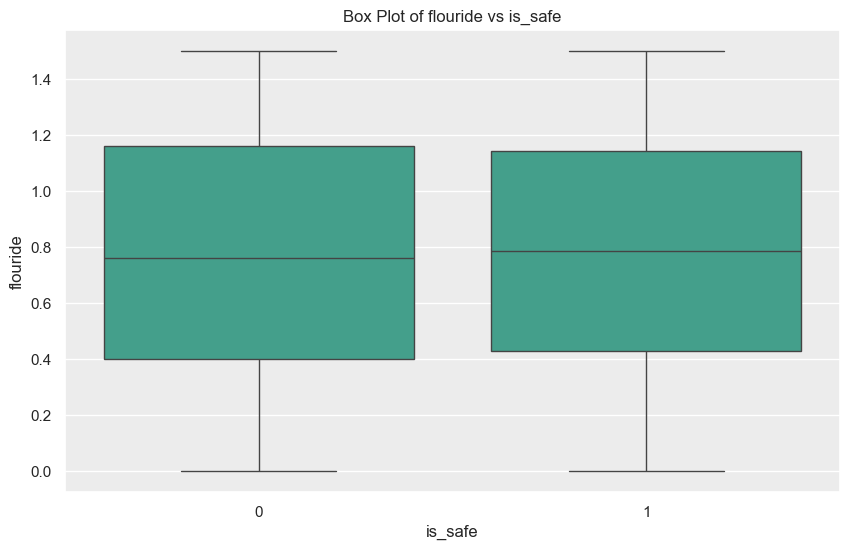

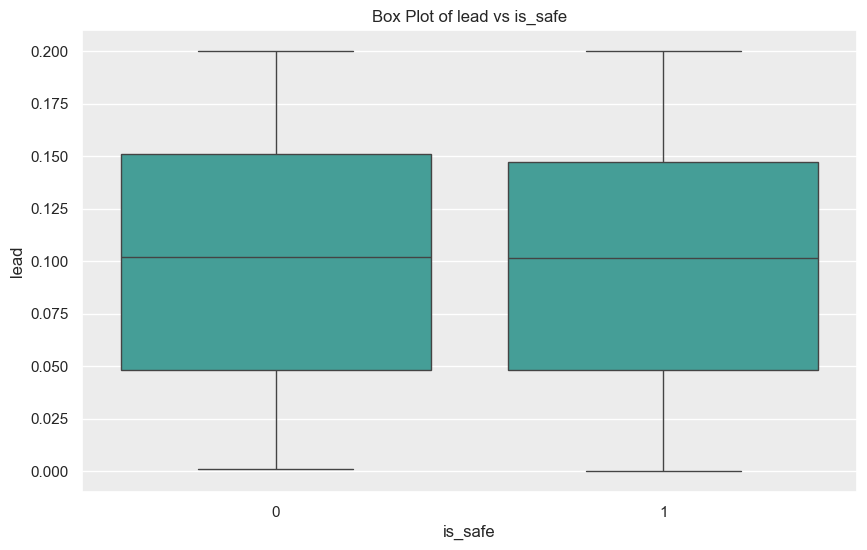

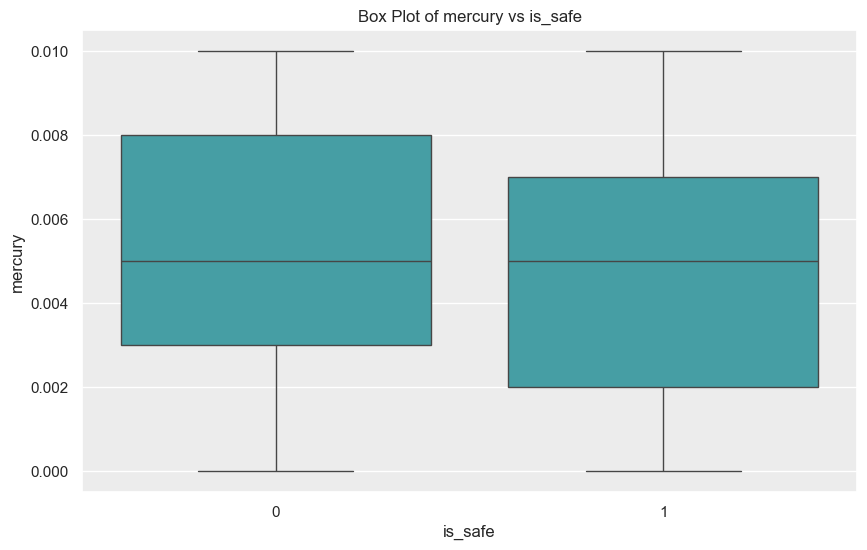

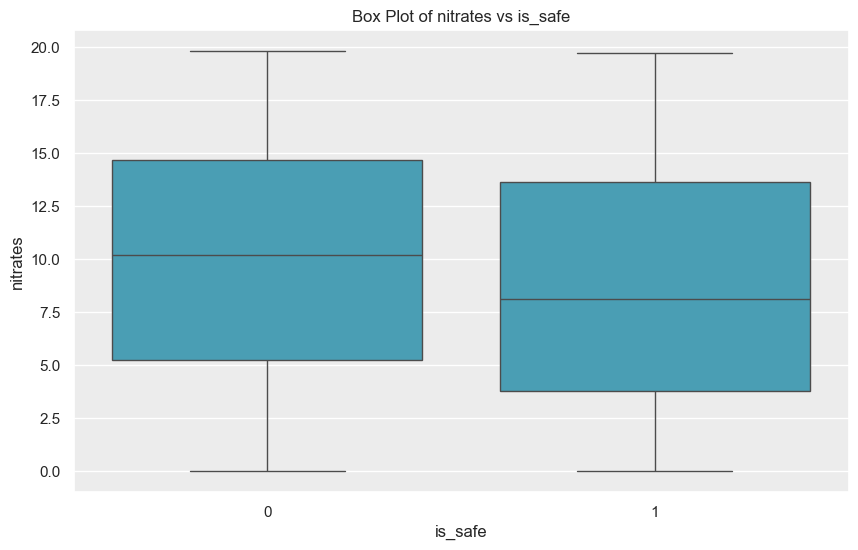

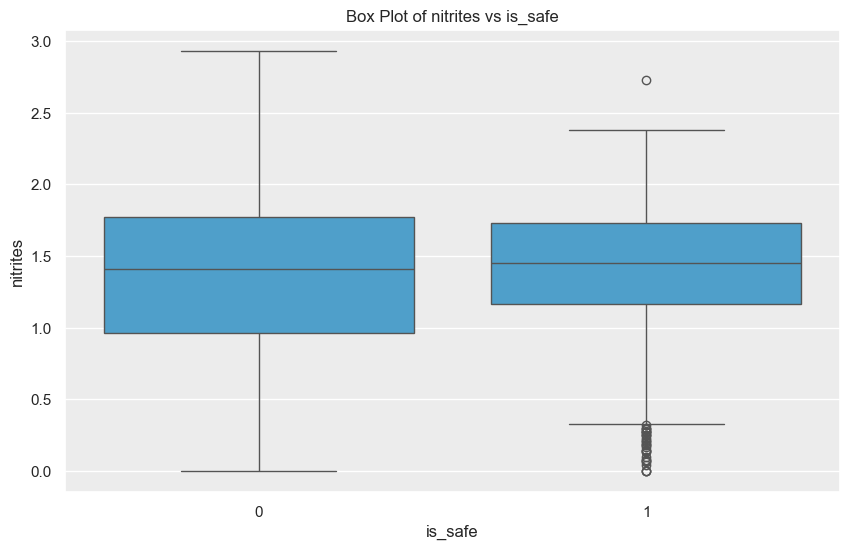

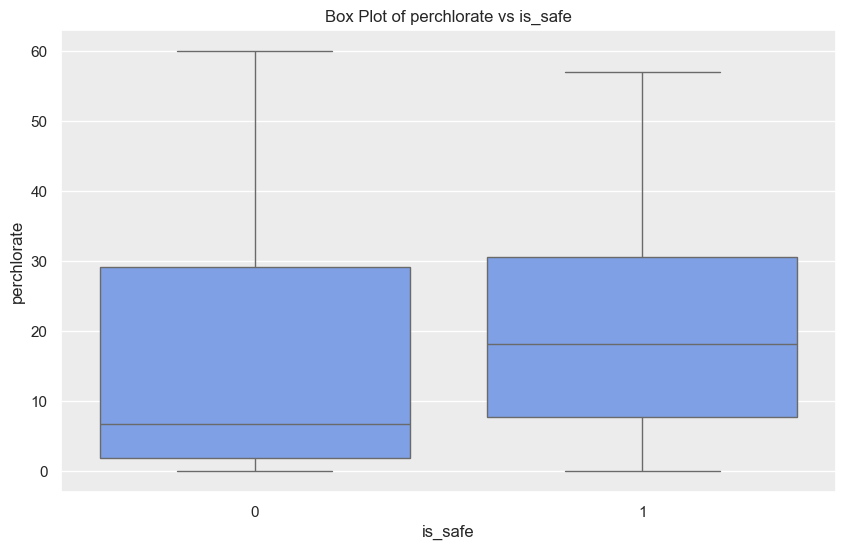

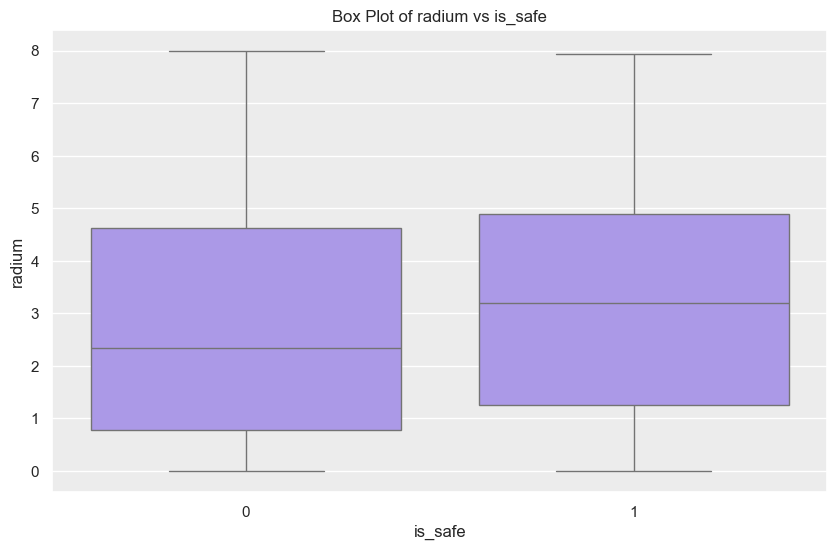

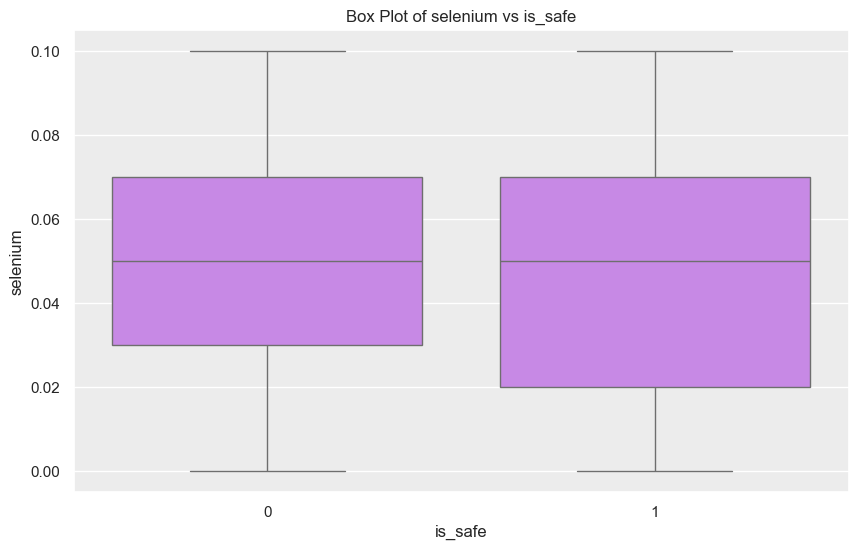

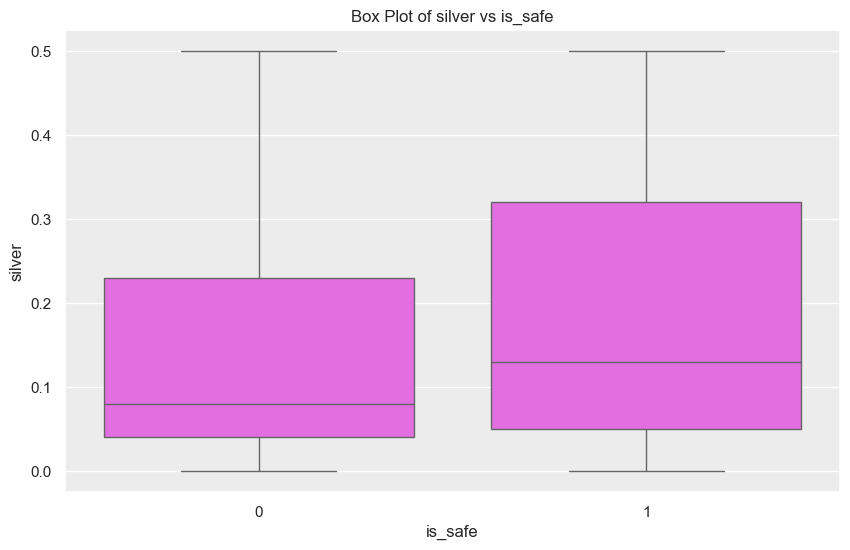

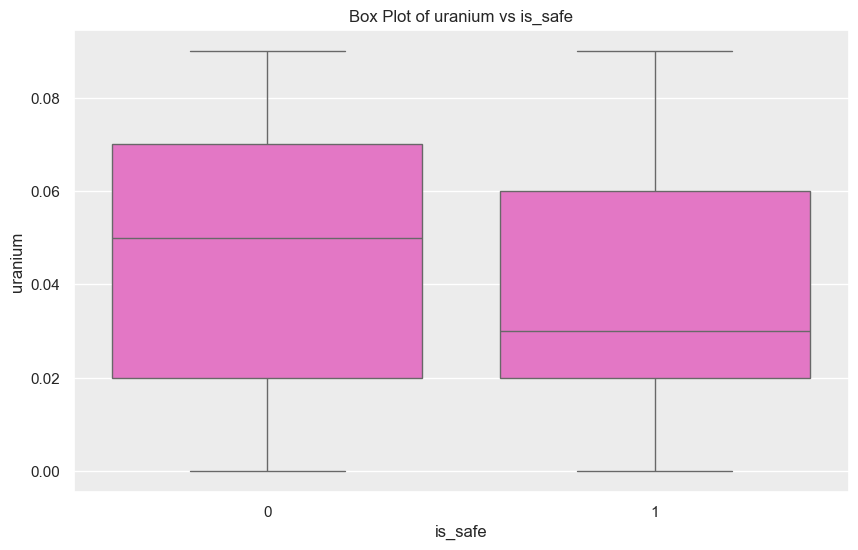

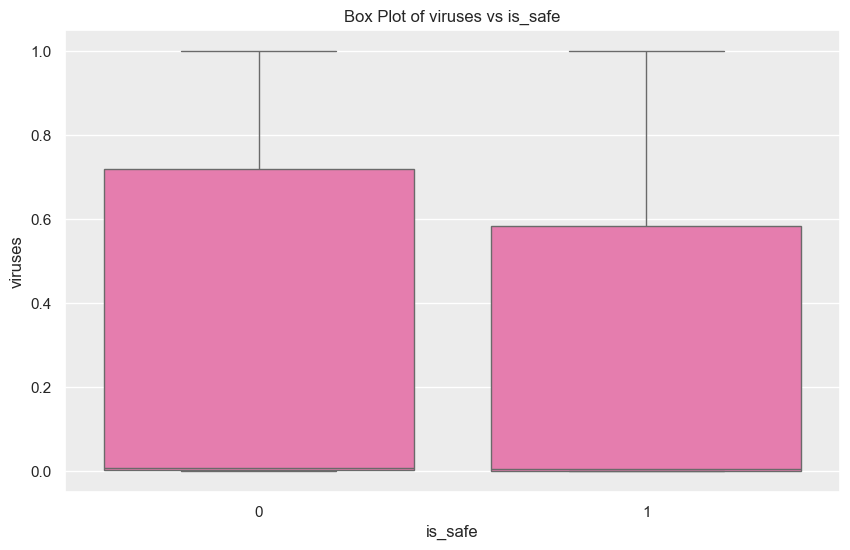

In [283]:
# Identify the target variable
target = 'is_safe'

# Separate the independent variables
independent_vars = df.columns.difference([target])

palette = sns.color_palette("husl", len(independent_vars))

# Create box plots for all independent variables with different colors
for i, var in enumerate(independent_vars):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target, y=var, data=df, palette=[palette[i]])
    plt.title(f'Box Plot of {var} vs {target}')
    plt.xlabel(target)
    plt.ylabel(var)
plt.show();

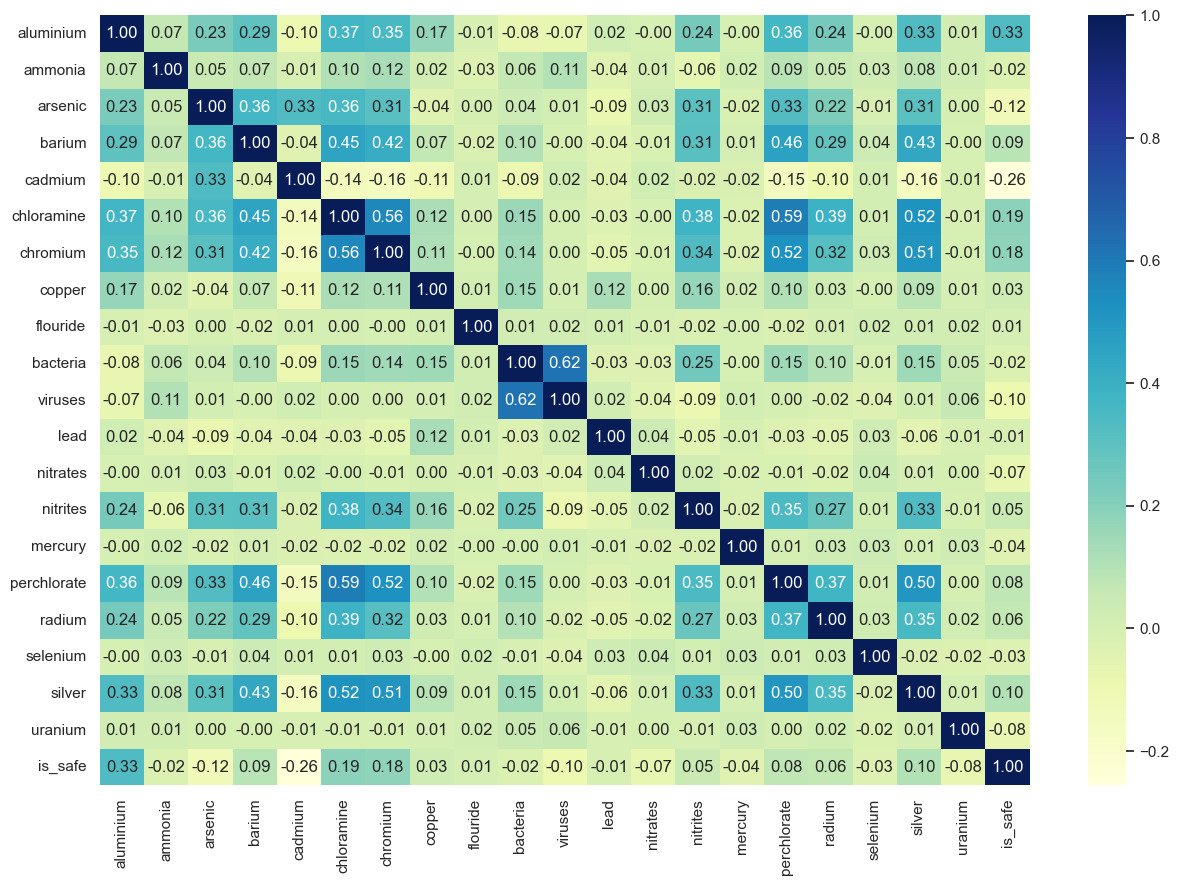

In [284]:
# Plotting heatmap
plt.figure(figsize = (15, 10))
df_corr = df.corr()
sns.heatmap(df_corr, fmt = ".2f", annot = True, cmap = "YlGnBu")
plt.show()

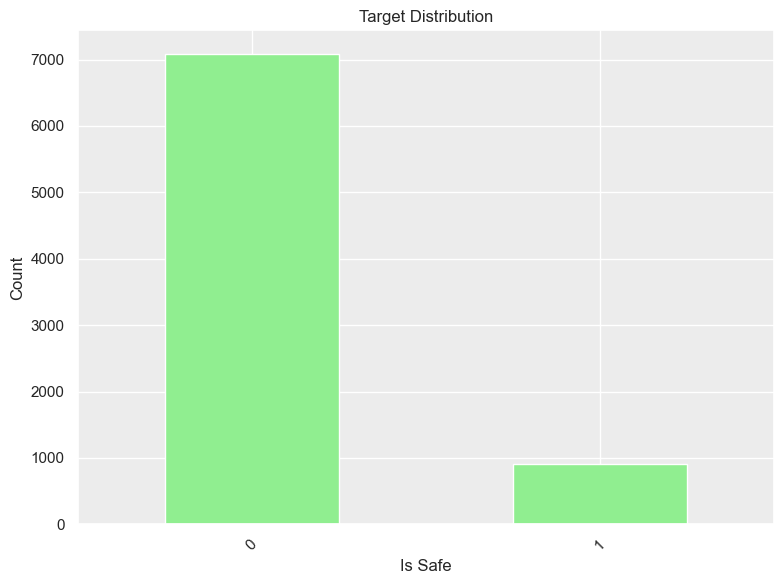

In [285]:
is_safe = df['is_safe'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
is_safe.plot(kind='bar', color='lightgreen')
plt.title('Target Distribution')
plt.xlabel('Is Safe')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


#### Model Building

In [286]:
X = np.array(df)
features = X[:,0:19]
target = X[:,-1]

# Splitting data for Model Building
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) 

In [287]:
# Fitting the model

model = KNeighborsClassifier()
model.fit(X_train,y_train)

# Predicting for training set
train_pred = model.predict(X_train)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train,train_pred)
print("Training accuracy is : " + str(train_accuracy))

# Getting confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_pred))
print("Classification Report:")
print(classification_report(y_train, train_pred))

Training accuracy is : 0.9111944965603502
Confusion Matrix:
[[5620   64]
 [ 504  208]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5684
         1.0       0.76      0.29      0.42       712

    accuracy                           0.91      6396
   macro avg       0.84      0.64      0.69      6396
weighted avg       0.90      0.91      0.89      6396



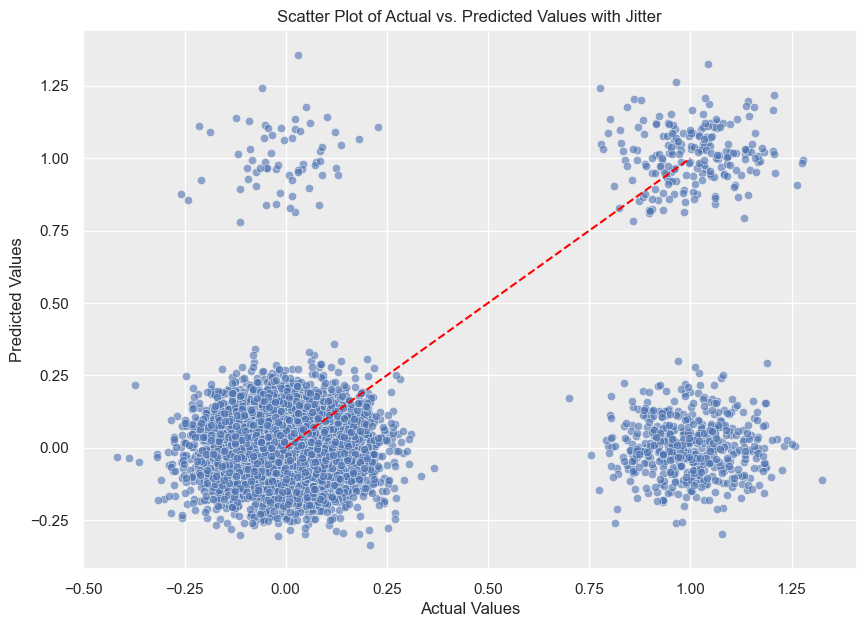

In [288]:
# Adding jitter to avoid overlap in scatter plot
def add_jitter(arr, jitter_strength=0.1):
    stdev = jitter_strength * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# Plotting the scatter plot for actual vs predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=add_jitter(y_train), y=add_jitter(train_pred), marker='o', alpha=0.6)

# Adding a diagonal line to show perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values with Jitter')
plt.show()

In [289]:
# Predicting for testing set
test_pred = model.predict(X_test)

# Calculating testing accuracy
test_accuracy = accuracy_score(y_test,test_pred)
print("Training accuracy is : " + str(test_accuracy))

# Getting confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test,test_pred))
print("Classification Report:")
print(classification_report(y_test,test_pred))


Training accuracy is : 0.8625
Confusion Matrix:
[[1359   41]
 [ 179   21]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93      1400
         1.0       0.34      0.10      0.16       200

    accuracy                           0.86      1600
   macro avg       0.61      0.54      0.54      1600
weighted avg       0.82      0.86      0.83      1600



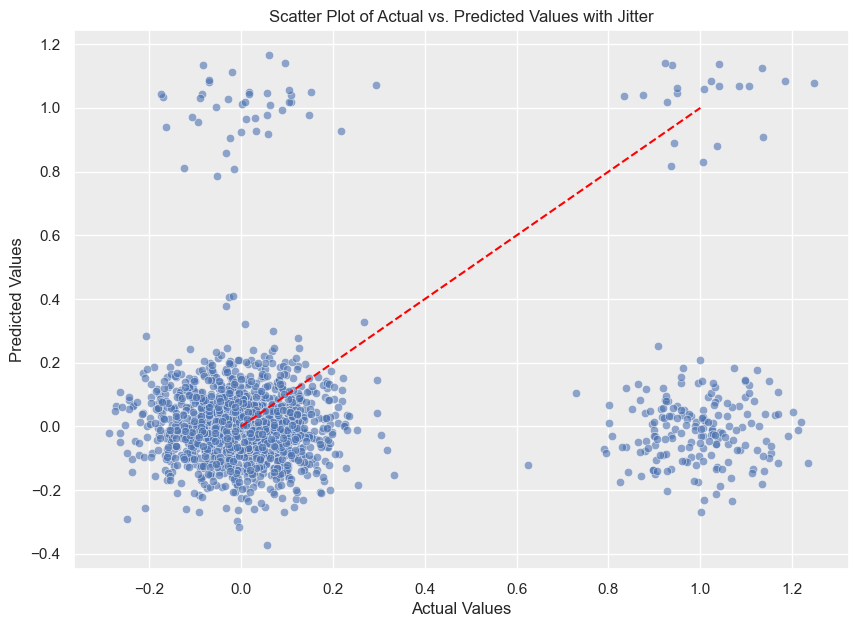

In [290]:
# Plotting the scatter plot for actual vs predicted values
plt.figure(figsize=(10, 7))
sns.scatterplot(x=add_jitter(y_test), y=add_jitter(test_pred), marker='o', alpha=0.6)

# Adding a diagonal line to show perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values with Jitter')
plt.show()

#### Model Improvement

In [291]:
n_components = 12

# Importing PCA
from sklearn.decomposition import PCA
 
# Let's say, components = 2
pca = PCA(n_components=12)
pca.fit(X)
x_pca = pca.transform(X)
 
# Create the dataframe
df_pca1 = pd.DataFrame(x_pca,columns=['PC{}'.format(i+1) for i in range(n_components)])
print(df_pca1)

            PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0     20.875094   6.460591  6.377741 -0.075213 -4.468788  1.176144  0.683676   
1     16.518599  -5.860612 -7.776526  1.008795  1.832076  1.220882  0.589493   
2     33.872073   2.291372  4.502261  0.868194 -2.580851 -1.195053 -1.749896   
3     -6.982723   2.501815 -8.403896  3.420961  5.031750  0.321890  0.619224   
4      1.035591  -9.979904 -3.154869 -0.397186  0.542414 -0.216626 -1.444306   
...         ...        ...       ...       ...       ...       ...       ...   
7991 -13.441977   5.673185  4.448488 -0.555633 -0.545002  0.212029  0.908805   
7992 -14.563406 -10.827515  0.293340 -1.299944  0.241330 -0.217025 -0.346170   
7993 -15.619716   6.448067  6.054763  1.461705 -2.448939 -0.271492 -0.401118   
7994 -16.733170   3.333144 -9.856313 -0.688998  2.457217 -0.059811  0.824874   
7995 -15.618424   6.448248  6.054627  1.466486 -2.445993 -0.290451 -0.302166   

           PC8       PC9      PC10     

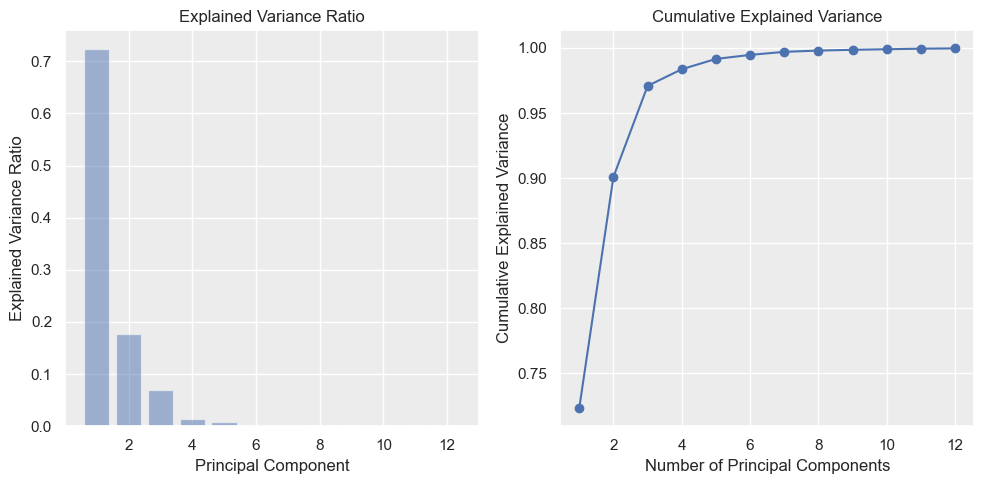

In [292]:
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio and cumulative explained variance
plt.figure(figsize=(10, 5))

# Plot explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')

# Plot cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


In [293]:
target=X[:,-1]

# Splitting data for model building
im_X_train, im_X_test, im_y_train, im_y_test = train_test_split(df_pca1, target, test_size=0.2, random_state=42)

# Fitting the model
model = KNeighborsClassifier()
model.fit(im_X_train,im_y_train)

# Predicting for training set
im_train_pred = model.predict(im_X_train)

# Calculating training accuracy
im_train_accuracy = accuracy_score(im_y_train,im_train_pred)
print("Training accuracy is: " + str(im_train_accuracy))

# Getting confusion matrix and Classification report
print("Confusion Matrix: ")
print(confusion_matrix(im_y_train,im_train_pred))

print("Classification Report: ")
print(classification_report(im_y_train,im_train_pred))

Training accuracy is: 0.9177611006879299
Confusion Matrix: 
[[5632   52]
 [ 474  238]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      5684
         1.0       0.82      0.33      0.48       712

    accuracy                           0.92      6396
   macro avg       0.87      0.66      0.72      6396
weighted avg       0.91      0.92      0.90      6396



In [294]:
# Predicting for testing set
im_test_pred = model.predict(im_X_test)

# Calculating testing accuracy
im_test_accuracy = accuracy_score(im_y_test,im_test_pred)
print("Training accuracy is: " + str(im_test_accuracy))

# Getting confusion matrix and Classification report
print("Confusion Matrix: ")
print(confusion_matrix(im_y_test,im_test_pred))

print("Classification Report: ")
print(classification_report(im_y_test,im_test_pred))

Training accuracy is: 0.8725
Confusion Matrix: 
[[1369   31]
 [ 173   27]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1400
         1.0       0.47      0.14      0.21       200

    accuracy                           0.87      1600
   macro avg       0.68      0.56      0.57      1600
weighted avg       0.84      0.87      0.84      1600



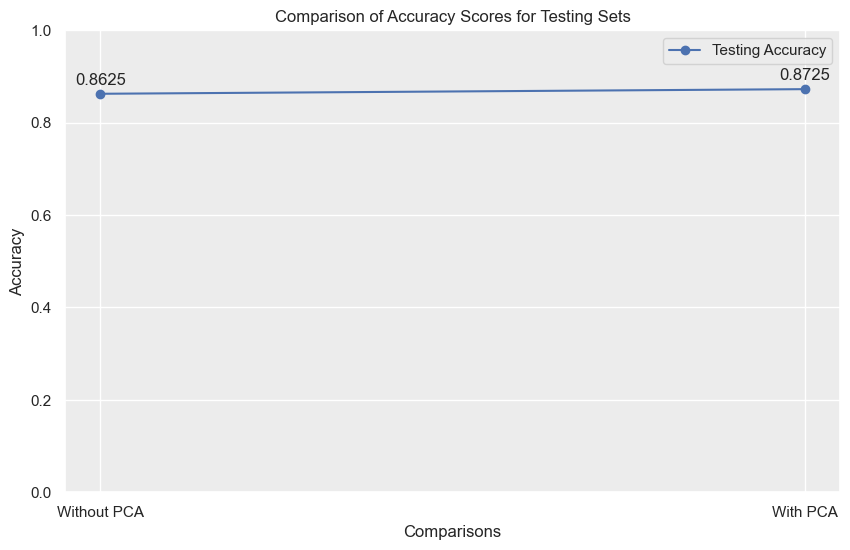

In [295]:
comparisions = ['Without PCA' , 'With PCA']
accuracies = [test_accuracy, im_test_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(comparisions, accuracies, marker='o', linestyle='-', color='b', label='Testing Accuracy')
plt.ylim(0, 1)
plt.xlabel('Comparisons')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Scores for Testing Sets')
plt.legend()
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, round(acc, 4), ha='center')
plt.show()

#### Hyperparameter Tuning

In [296]:

# create numpy array for future K value
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [297]:
# Code Help taken from : https://www.kaggle.com/code/elisthefox/ultimate-guide-to-k-nearest-neighbors-k-nn#4.-Results-of-K-NN-implementation-after-preparation-of-data

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(im_X_train, im_y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(im_X_train, im_y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(im_X_test,im_y_test)

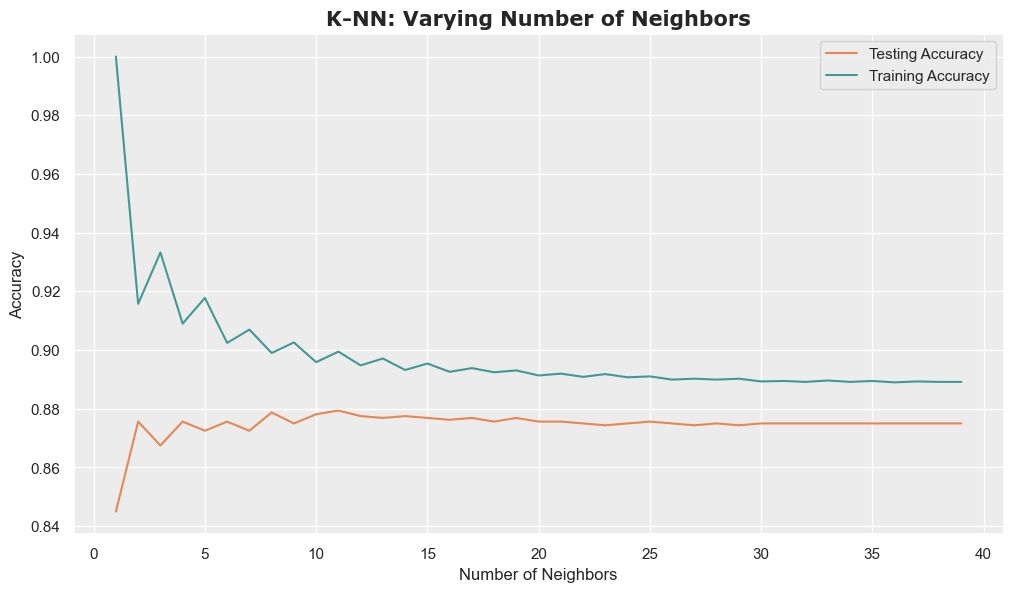

In [298]:
# Generate plot
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of all plots
plt.figure(figsize=(12,6.5)) 
plt.title(label='K-NN: Varying Number of Neighbors', fontsize=15, fontweight='bold', fontname='Verdana', ha='center')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy', color='#E68753')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy', color = '#409996')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show();